                 Score  Avg Query Time (s)  Avg Query Memory (MB)
LLM                                                              
llama3.2:latest   7.32                0.09                   3.15
mistral:latest    7.61                0.16                   5.24


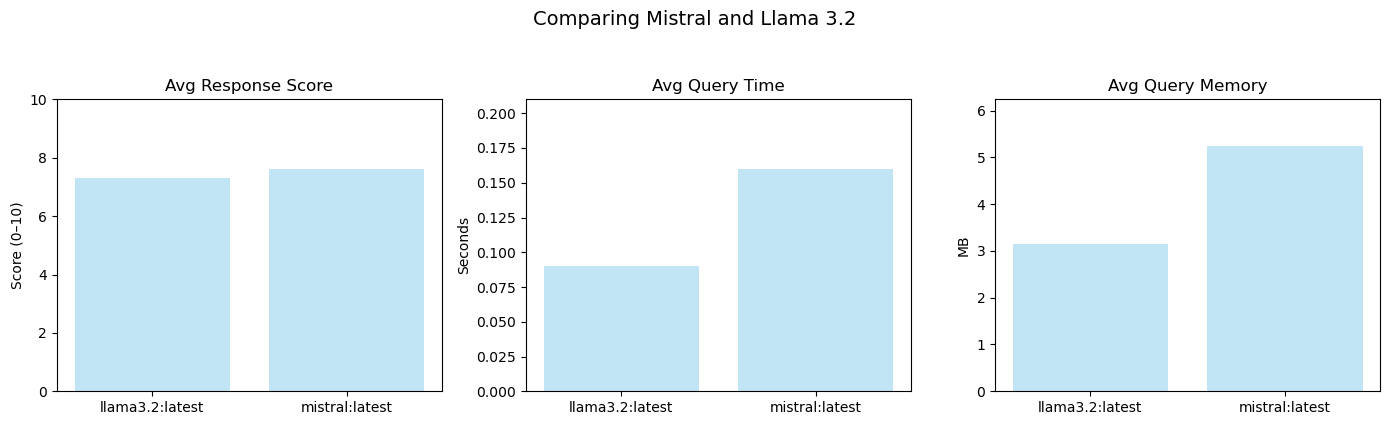

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


# Load the newly uploaded CSV file
df = pd.read_csv("pipeline_result(Sheet1).csv")

# Group by LLM and calculate mean values needed for plotting
llm_summary = df.groupby("LLM")[["Score", "Avg Query Time (s)", "Avg Query Memory (MB)"]].mean().round(2)
print(llm_summary)

# Extract values from the summary
models = llm_summary.index.tolist()
scores = llm_summary["Score"].tolist()
query_times = llm_summary["Avg Query Time (s)"].tolist()
memory_usage = llm_summary["Avg Query Memory (MB)"].tolist()

fig, axs = plt.subplots(1, 3, figsize=(14, 4))
plt.suptitle("Comparing Mistral and Llama 3.2", fontsize=14, y=1.05)

# Bar chart: Response Score
axs[0].bar(models, scores, color='#c2e5f5')
axs[0].set_title("Avg Response Score")
axs[0].set_ylabel("Score (0–10)")
axs[0].set_ylim(0, 10)

# Bar chart: Query Time
axs[1].bar(models, query_times, color='#c2e5f5')
axs[1].set_title("Avg Query Time")
axs[1].set_ylabel("Seconds")
axs[1].set_ylim(0, max(query_times) + 0.05)

# Bar chart: Memory Usage
axs[2].bar(models, memory_usage, color='#c2e5f5')
axs[2].set_title("Avg Query Memory")
axs[2].set_ylabel("MB")
axs[2].set_ylim(0, max(memory_usage) + 1)

plt.tight_layout()
plt.show()

fig.savefig('output.png')